<a href="https://colab.research.google.com/github/antoineodier/pytorchSeminar/blob/master/01_intro_de.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workshop: Neuronale Netzwerke mit PyTorch
=======================


*************************************************************
*************************************************************
## Jupyter Notebooks
- Web Application zum teilen und kreieren von diversen Inhalten: 
    - Live Code
    - Visualization
    - Text
    - Images
    - Links
    - etc.

## Google Colab
- Basiert auf Jupyter Notebooks
- Virtual Linux Machine in der Cloud
- Option: GPU (momentan Nvidia Tesla K80 (12GB) oder T4 mit 16GB!)
- Python2/3 & viele Machine Learning Pakete vorinstalliert
- Pakete über *pip* nachinstallierbar 

- Notebooks teilbar über Google Drive



## Notebooks für den Workshop: 
Notebooks in diesem Workshop basieren auf Google Colab **Python3/GPU** runtime environments

Slides: https://drive.google.com/open?id=1dxRKWJAniHK1lP9TwDda6avqCoFO8gHDLhcR465hGhA

1. Intro: https://drive.google.com/open?id=1ELdaAP_MmwhUrEIE2uV_ZnlqE5v9e84k
2. PyTorch: https://drive.google.com/open?id=1q_K78oYK--UtR5F62dwFe6PA211EUH3S
3. MLP: https://drive.google.com/open?id=1YvkfZxeFK-4EhVSYlIuv0-3RDBWDHOgx
4. CNN: https://drive.google.com/open?id=1OQUIsw4cP09SC5Gl7Q6EnOsyX_9iLGde
5. RNN: https://drive.google.com/open?id=1VuURQojNAheOk3x5OIIK5yRbj2BFHQEV


## Kopieren der Notebooks
- Log dich mit deinem Google account ein gehe mit deinem Browser zu den Links
- Öffne das Dokument mit Colab und mache eine Kopie davon in deinem Gdrive Folder
- Gehe zum kopierten Dokument und schließe das Originaldokument (das Original kannst du nicht editieren)
- Diese Kopie ist nun deine persönliche Version, das du beliebig editieren und mit rumspielen kannst





### Linux Command Line Befehle auf der VM mit '!'

In [0]:
!ls -lh
!nvidia-smi

total 4.0K
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data
Sat Oct 12 11:46:49 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:            

### Dateien auf die VM kopieren (Autorisierung)



In [0]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# This will pop up:
# Go to the following link in your browser:
# Enter verification code: ______________
#
# - Follow the link
# - Select your Google account
# - Copy authorization code from pop up page
# - Paste in this notebook
# - Hit Return. Done.

### Upload der data.zip auf die VM

In [0]:
import io
from googleapiclient.http import MediaIoBaseDownload

# data
file_id = '11m4F3EID3xreRkCWSixar_tFZxBWZRy8'
request = drive_service.files().get_media(fileId=file_id)
data = io.BytesIO()

downloader = MediaIoBaseDownload(data, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

data.seek(0)
# print('Downloaded file contents are: {}'.format(data_train.read()))

with open('data.zip', 'wb') as f:
  f.write(data.read())

In [0]:
!ls -lh

total 17M
-rw-r--r-- 1 root root 2.6K Oct 12 11:48 adc.json
-rw-r--r-- 1 root root  17M Oct 12 11:48 data.zip
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data


In [0]:
!unzip data.zip

**************************************
**********************************************************************************************
# Scientific Python Stack
******************************************************************
Eine kleine Auswahl von häufig benutzen Data Science Bibliotheken, sortiert von low Level nach high Level:

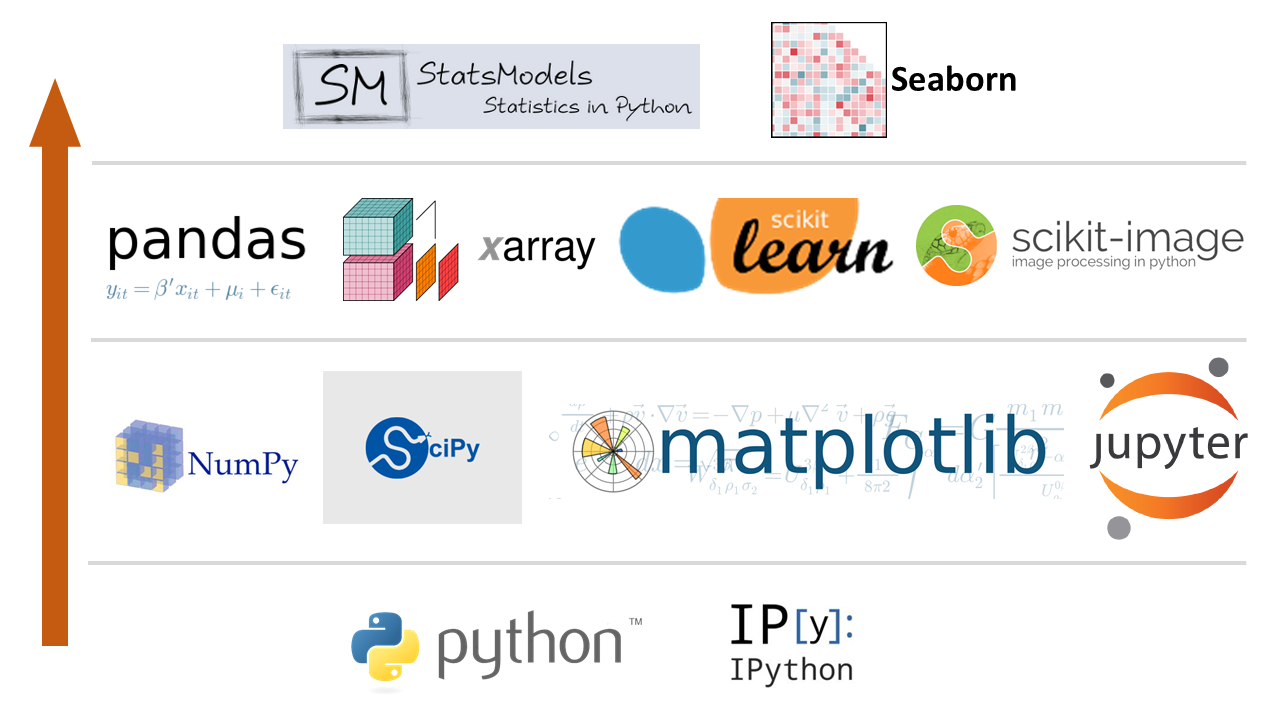

In [0]:
from IPython.display import Image
Image('data/scipy_stack.png', width=600)

### In diesem Workshop werden wir mit diesen Python Libraries arbeiten:

- Jupyter
- Numpy
- Matplotlib
- Scikit-Learn
- PyTorch
- TorchVision


*************************************************************
## Numpy
*************************************************************



In [0]:
import numpy as np
np.__version__

'1.16.5'

### Numpy
Numpy ist eine numerische Library für die optimierte Repräsentation und Berechnung von multidimensionalen Arrays 
- Optimierte Berechnungen auf der CPU in C und Fortran (z.B. MKL, BLAS, LAPACK)


### Multidimensionale Arrays oder "Tensoren"
Tensor: Generalisiertes multi-dimensionales Array


#### Mehr Details und Beispiele später: PyTorch Tensor Interface is stark inspiriert durch Numpy

*************************************************************
## Matplotlib
*************************************************************
Plotting Library für 2D und 3D Diagramme, inspiriert durch GNUplot und MATLAB.

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


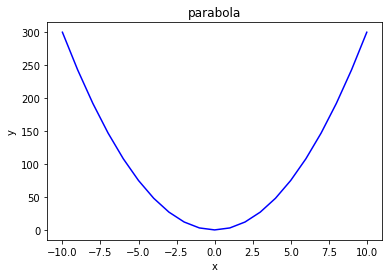

In [0]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 21)  # evenly distributed points
print(x)

y = 3. * x ** 2

plt.plot(x, y, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('parabola')
plt.show()

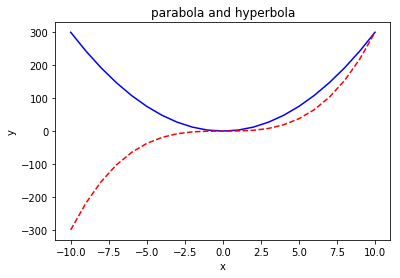

In [0]:
y2 = 0.3 * x ** 3

plt.plot(x, y, 'b')
plt.plot(x, y2, 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('parabola and hyperbola')
plt.show()

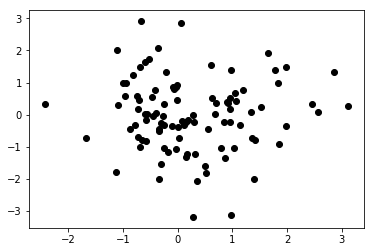

In [0]:
xr = np.random.randn(2, 100)

plt.scatter(xr[0], xr[1], color='k')
plt.show()


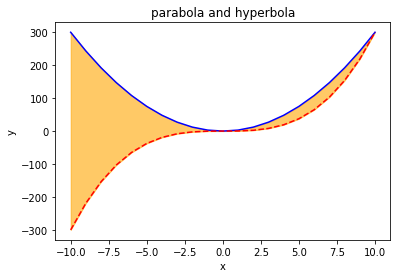

In [0]:
plt.fill_between(x, y, y2, color='orange', alpha=0.6)
plt.plot(x, y, 'b')
plt.plot(x, y2, 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('parabola and hyperbola')
plt.show()

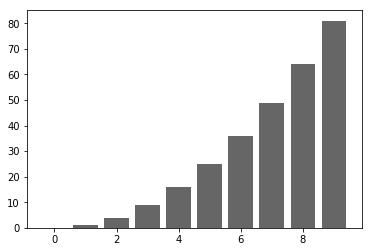

In [0]:
n = np.arange(0, 10, 1)
plt.bar(n, n**2, align="center", width=0.8, alpha=0.6, color='black')
plt.show()

In [0]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def potential(x, y):
    return 2. * x**2 + 1. * y**2

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

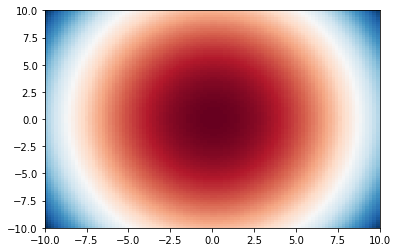

In [0]:
plt.pcolor(X, Y, Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
plt.show()

*************************************************************
# PyTorch
*************************************************************

PyTorch ist eine Python Library für High-Level Computation:

- Optimierte Tensor Berechnungen auf der CPU und der GPU in **torch**
- Automatische *on-the-fly* Differenzierung mit **torch.autograd**
- Diverse Tools und vordefinierte Module für Neural Networks mit **torch.nn**
- Optimizer Tools in **torch.optim**
- Data I/O und Transformationsfunktionen in **torch.utils**

Erweiterungen:
- Tools und Daten für Computer Vision (CV): **torchvision**
- Tools  und Daten für Natural Language Processing (NLP): **torchtext**


## PyTorch & Numpy
Die PyTorch Tensor-Funktionalitäten sind sehr stark inspiriert durch Numpy:
- PyTorch stellt viele Lineare Algebra Funktionen für n-dimensionale Arrays (Tensoren) bereit (wie Numpy) 
- inkl. optimierter Berechnungen auf der CPU (wie Numpy) & **GPU**
- Broadcasting (wie bei Numpy)


### Tensoren
Tensor: Generalisiertes multi-dimensionales Array

- 0-dimensional Tensor: Skalar (z. B. eine Zahl)
- 1-dimensional Tensor: Vektor (z. B. Sequenz von Wörtern)
- 2-dimensional Tensor: Matrix (z. B. Grayscale Image)
- ...
- höher dimensionale Tensor: n-dimensionaler Tensor

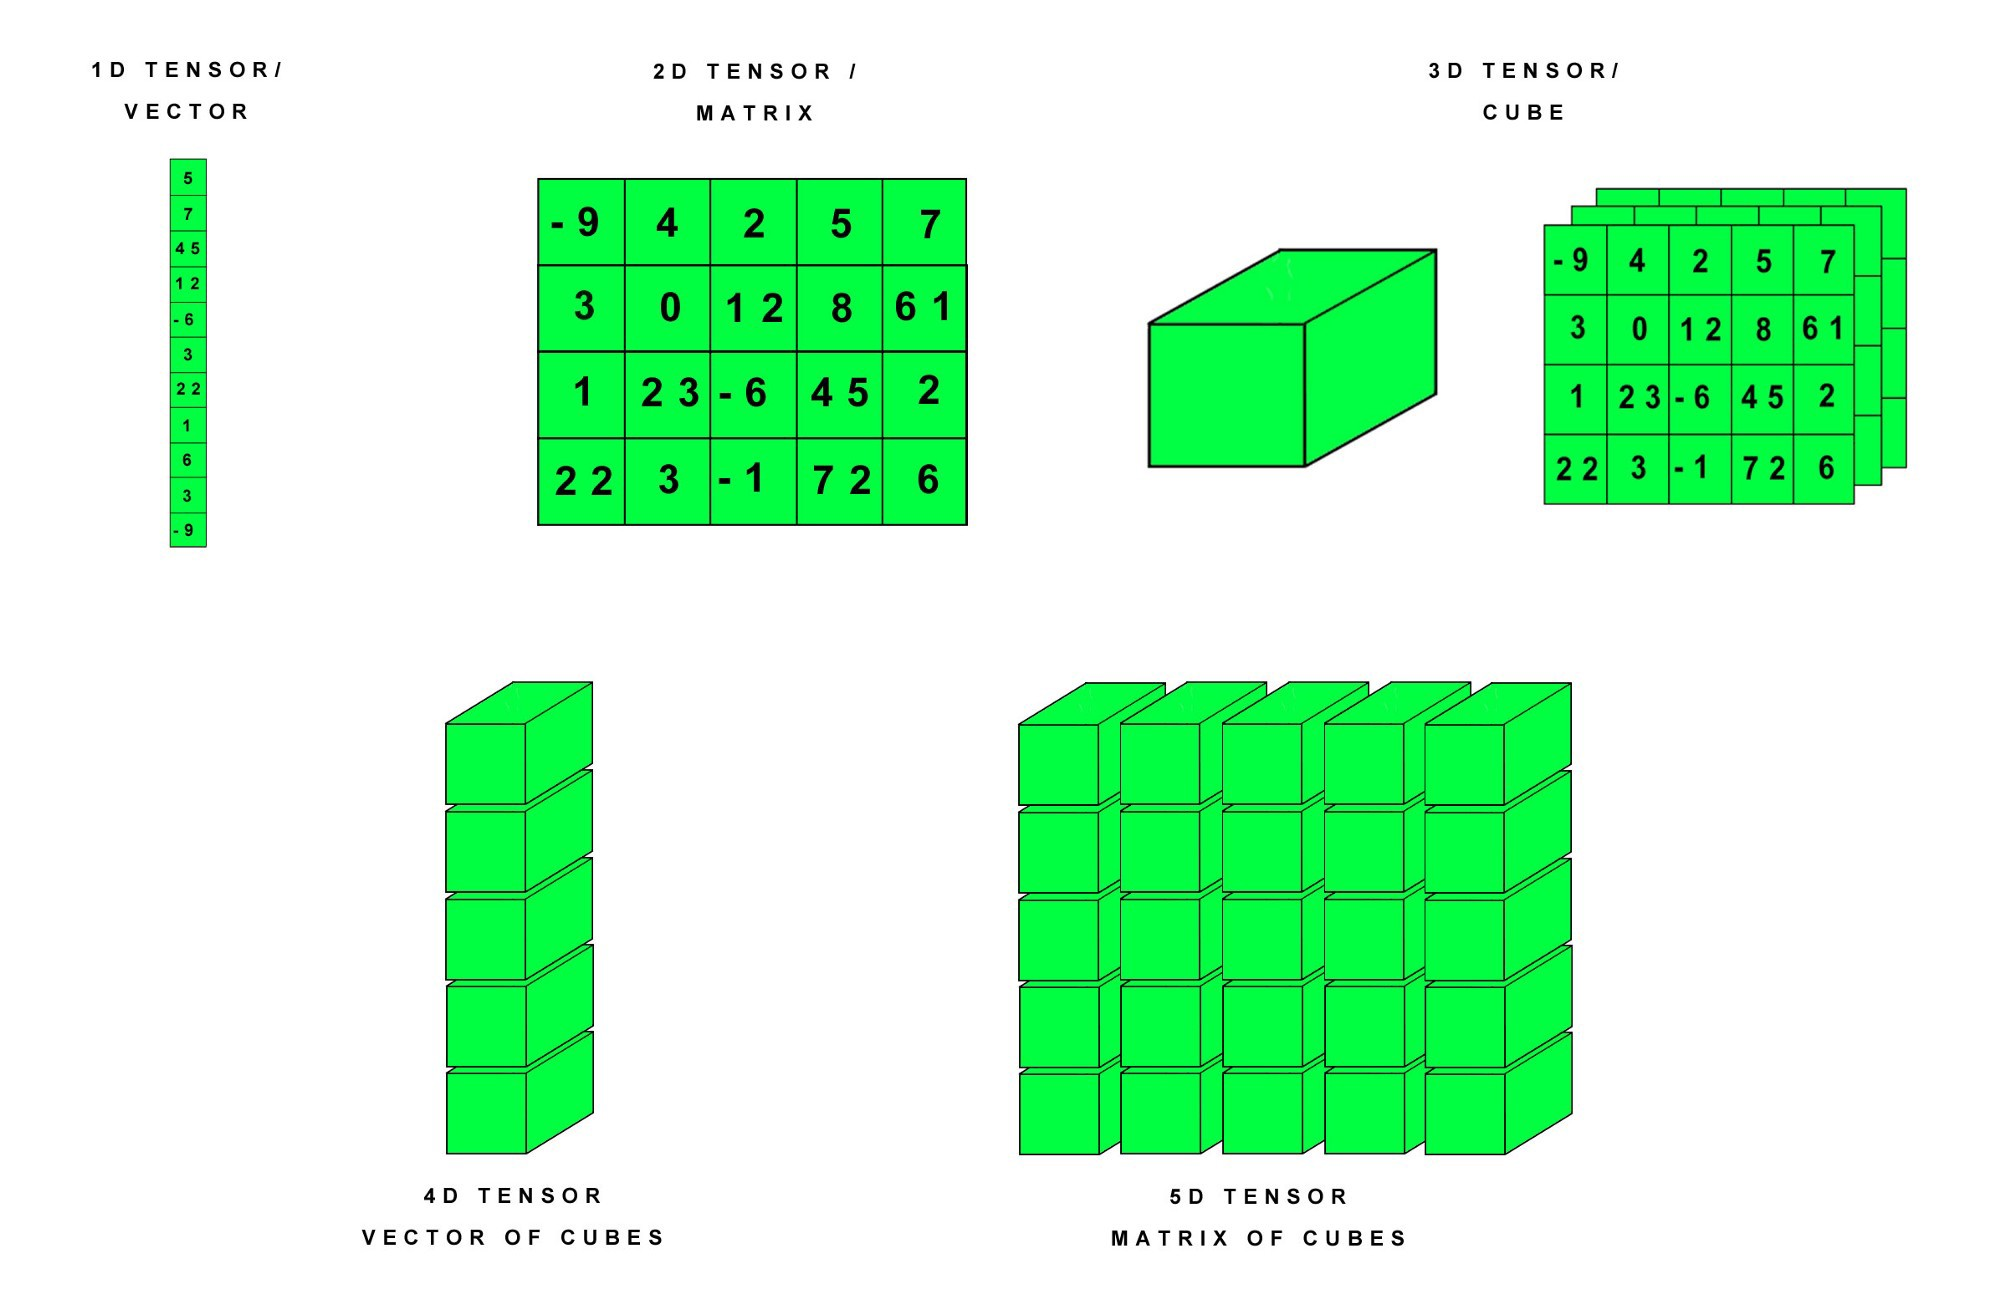

In [0]:
from IPython.display import Image
Image('data/tensors.jpg', width=500)

### Bedeutung von Tensoren:
- Tensoren werden für die Repräsentation von Input, interne States und Parameter des Netzwerks verwendet.
- Neuronale Netzwerke werden als Graphen von Tensoren und Tensor-Operationen (Lineare Algebra) realisiert.

Die Torch-Tensoren sind stark inspiriert durch Numpy nd-arrays!
Die meisten Tensor-Funktionen und -Operationen in Numpy gibt es auch für Torch-Tensoren.
Oft haben sie die gleichen Namen. Und man kann sie problemlos hin- und herkonvertieren!


## Beispiele

In [0]:
import torch
torch.__version__

'1.2.0'

In [0]:
# eindimensionaler Tensor mit 8 (unitialisierten) Elementen
x = torch.Tensor(8)  # Default Tensor ist ein FloatTensor (float32)

print(x)

print(x.size())  # wie numpy shape

x.fill_(2.55)  # Initialisierung, _ deutet auf Inplace Operation

tensor([1.9654e-35, 0.0000e+00, 3.7835e-44, 0.0000e+00,        nan,        nan,
        1.3733e-14, 6.4069e+02])
torch.Size([8])


tensor([2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500])

In [0]:
x.double()  # Konvertierung nach float64 Tensor

tensor([2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500],
       dtype=torch.float64)

In [0]:
x.int()  # Konvertierung nach int32 Datentyp

tensor([2, 2, 2, 2, 2, 2, 2, 2], dtype=torch.int32)

In [0]:
x.sum()  # Summe über alle Elemente

In [0]:
x.mean() # Durchschnitt über alle Elemente

In [0]:
x.median() # Median über alle Elemente

tensor(2.5500)

In [0]:
x.std() # Standardabweichung über alle Elemente

In [0]:
x = torch.Tensor(2)  # Ein PyTorch Tensor Skalar
print(x.type())
x.shape

In [0]:
# Python Skalar aus PyTorch Skalar
print(x.item())

In [0]:
# 2D Long Tensor aus Nullen
x = torch.zeros([2, 2]).long()
print(x)

# oder equivalent:
x = torch.zeros([2, 2], dtype=torch.int64)
print(x)

In [0]:
# Zuweisung einzelner Elemente
x[0, 1] = 2
print(x)

x[1, 0] = 2
print(x)

x[1, 1] = 3
print(x)

In [0]:
# Zuweisung mehrerer Elemente
x[0, :] = torch.LongTensor([0, 1])
print(x)

In [0]:
# Matrix Multiplikation
x.mm(x)

In [0]:
# Konvertierung nach numpy
x = x.numpy()
x.dot(x)  # Matrix Multiplikation in numpy

In [0]:
# Konvertierung zurück nach PyTorch Tensor
x = torch.from_numpy(x)
x

TypeError: ignored

In [0]:
# Aneinanderhängen von Tensoren (concat)

y = torch.ones([2, 3]).long()
print(x)
print(y)
print(x.size())
print(y.size())

x = torch.cat([x, y], 1)  # Concat entlang Dimension 1, Dimensionskonvention wie in numpy
print(x)
print(x.size())

tensor([2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500, 2.5500])
tensor([[1, 1, 1],
        [1, 1, 1]])
torch.Size([8])
torch.Size([2, 3])


IndexError: ignored

In [0]:
print(x.size())
x

In [0]:
# max() & argmax()

print(x.max())   # Gibt Maximum wieder


In [0]:
print(x.max(0))  # Gibt Maxima & Argmax entlang Dimension 0 wieder


In [0]:
print(x.max(1))  # Gibt Maxima & Argmax entlang Dimension 1 wieder

### Broadcasting


Effiziente Operationen zwischen Arrays verschiedener Dimensionen, ohne explizite Anpassung der Arrays.
In der Regel wird das Array mit der kleineren Dimensionen in das Array der größeren Dimension implizit konvertiert, wenn es konsistent möglich ist.

Hier sind die ganz groben Regeln:
1. Wenn einer der Tensoren weniger Dimensionen hat als der andere, wird er derart modifiziert, dass durch
Hinzufügen von so vielen Dimensionen der Größe 1 an den Anfang, bis beide Tensoren die gleichen Dimensionen besitzen
2. Für jeden Unterschied bei der eine der beiden Größen eins ist, wird der Tensor entlang dieser Achse durch Replizieren von Koeffizienten erweitert.
3. Wenn es eine Abweichung der Tensorgröße für eine der Dimensionen gibt und keine von beiden eins ist, schlägt die Operation fehl.

Aber **Vorsicht!** Kann zu **nicht beabsichtigten** Operationen führen, wenn man nicht ganz genau weiß, was man da macht!

Hier sind einige Beispiele:



tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]])


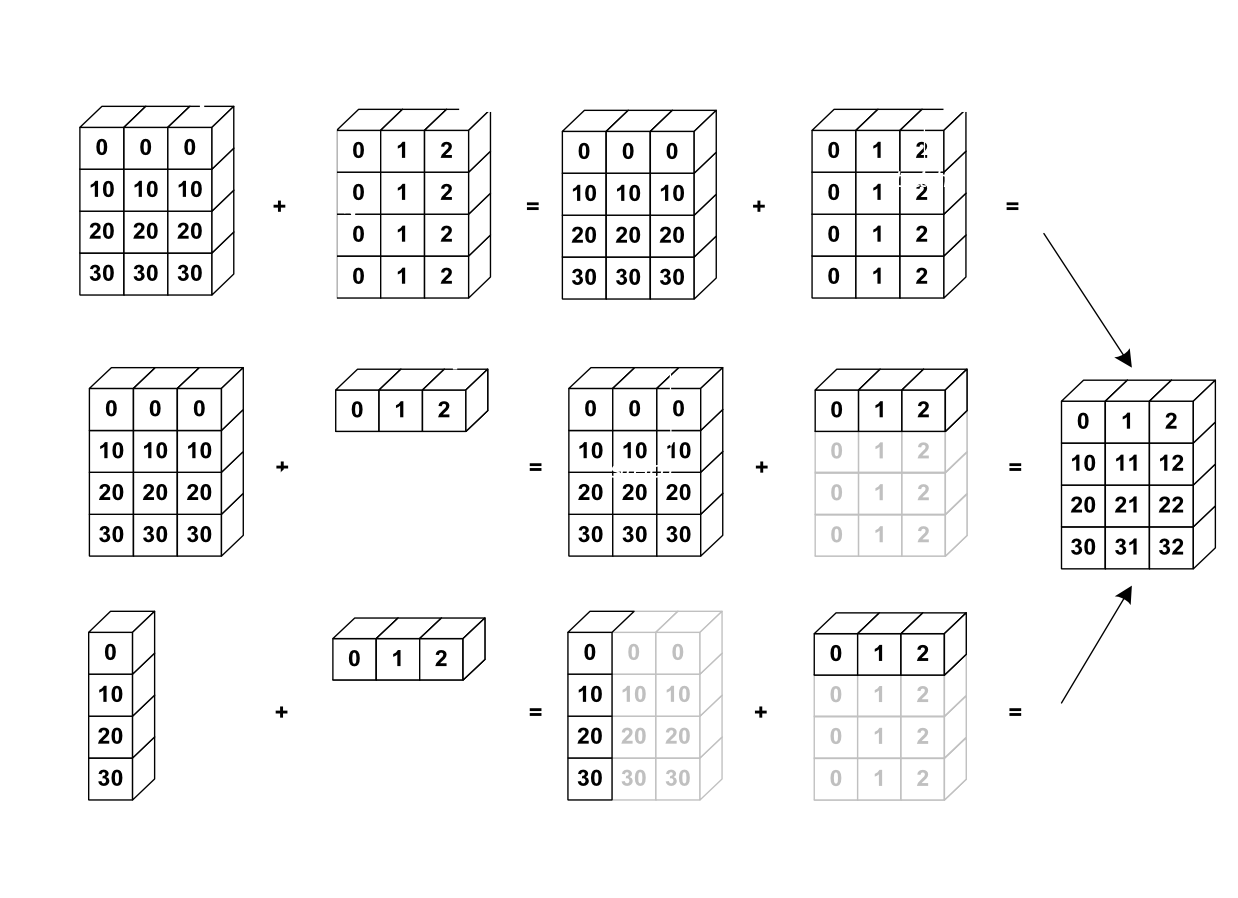

In [0]:
# 1. example w/o broadcasting
m1 = torch.tensor([[0, 0, 0],
                   [10, 10, 10],
                   [20, 20, 20],
                   [30, 30, 30]])
m2 = torch.tensor([[0, 1, 2],
                   [0, 1, 2],
                   [0, 1, 2],
                   [0, 1, 2]])

mfinal = m1 + m2
print(mfinal)

from IPython.display import Image
Image('data/broadcasting.png', width=600)

In [0]:
# same result due to broadcasting
m1 = torch.tensor([[0, 0, 0],
                   [10, 10, 10],
                   [20, 20, 20],
                   [30, 30, 30]])
m2 = torch.tensor([[0, 1, 2]])

mfinal = m1 + m2
print(mfinal)

tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]])


In [0]:
# extreme effect of broadcasting
m1 = torch.tensor([[0, 10, 20, 30]])
m2 = torch.tensor([[0, 1, 2]])

mfinal = m1.t() + m2  # transponent!
print(mfinal)


tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]])


## PyTorch unterstützt GPU Acceleration (CUDA)

In [0]:
# check if cuda is available and version
print(torch.cuda.is_available())
print(torch.version.cuda)

True
10.0.130


In [0]:
# check nvidia dev tools (colab GPU backend should run a Tesla T4)
!nvidia-smi

Fri Oct 11 08:01:05 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    32W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
x = torch.tensor([[0, 1, 2], [0, 1, 2]])

print(x.size())

# Tensor x ist defaultmäßig auf der CPU
print(x.device)

# Tensor x auf GPU verschieben
x = x.cuda()
print(x.device)

torch.Size([2, 3])
cpu
cuda:0


In [0]:
# Zurück auf die CPU
x = x.cpu().numpy()
y = x.copy()

In [0]:
x = torch.tensor([[0, 1, 2], [3, 4, 5]])
y = torch.tensor([[0, 1, 2], [6, 7, 8]])

print(x + y)

x = x.cuda()
y = y.cuda()

print(x + y)

print(x.size())


tensor([[ 0,  2,  4],
        [ 9, 11, 13]])
tensor([[ 0,  2,  4],
        [ 9, 11, 13]], device='cuda:0')
torch.Size([2, 3])


## Häufig benutzte Linear Algebra Funktionen

In [0]:
print(x)
x.t()

tensor([[0, 1, 2],
        [3, 4, 5]], device='cuda:0')


tensor([[0, 3],
        [1, 4],
        [2, 5]], device='cuda:0')

In [0]:
# oder
x.transpose(1, 0)

tensor([[0, 3],
        [1, 4],
        [2, 5]], device='cuda:0')

In [0]:
# or mit Permutierung
x.permute(1, 0)

tensor([[0, 3],
        [1, 4],
        [2, 5]], device='cuda:0')

In [0]:
# size() ist wie shape in numpy
x.size()

torch.Size([2, 3])

In [0]:
# Seit pytorch 0.4 auch Numpy-Naming: 
x.shape

torch.Size([2, 3])

In [0]:
# view ist wie reshape in numpy, es wird keine Kopie erstellt
x.view([6])

tensor([0, 1, 2, 3, 4, 5], device='cuda:0')

In [0]:
# Seit pytorch 0.4 gibt es auch reshape(), evtl wird eine Kopie erstellt 
x.reshape([1, 6])

tensor([[0, 1, 2, 3, 4, 5]], device='cuda:0')